###  Autor: Javier Garrucho Fernández

## Imágenes de dígitos escritos a manos

El conjunto de datos de dígitos escritos a mano se puede cargar en sklearn directamente:

In [1]:
from sklearn.datasets import load_digits
digitos = load_digits()

Podemos incluso visualizar cada dígito del conjunto de datos, y su clase:

<Figure size 432x288 with 0 Axes>

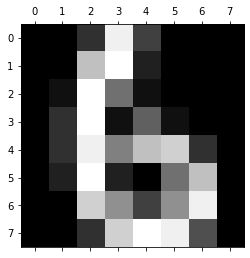

Clase de la imagen: 6


In [2]:
import matplotlib.pyplot as plt
plt.gray()
plt.matshow(digitos.images[234]) 
plt.show() 
print("Clase de la imagen: {}".format(digitos.target[234]))

In [3]:
import mglearn
import sklearn
import numpy as np

D:\Users\jgarr\AppData\Roaming\Python\Python37\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


Vamos a empezar analizando el conjunto de datos.

In [4]:
print(digitos.target_names) # nos muestra las posible clasificaciones que puede tener cada ejemplo.
print(digitos.data.shape) # para ver el tamaño de nuestro conjunto de datos, tanto el numero de ejemplos como de caracteristicas

[0 1 2 3 4 5 6 7 8 9]
(1797, 64)


El conjunto de dato consta de 1797 ejemplos y 64 características, que son los 64 pixeles de cada imagen de 8x8

También podemos ver la descripción del conjunto de datos:

In [5]:
print(digitos.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

Aunque en este caso el número de instancias que nos da la descripción no coincide, esto es porque nos da el tamaño del conjunto de datos original y nosotros estamos trabajando con un conjunto de datos reducido.

También podemos hacernos un "mapa de calor" de donde se encuentran los píxeles, para ver si hay características (pixeles) más relevantes que otras o alguna irrelevantes. Pero para ello antes vamos a separar el conjunto de test, para que las decisiones que tomemos no sean influidas por el conjunto de test.

In [6]:
from sklearn.model_selection import train_test_split

Dividimos el conjunto de datos en conjunto de entrenamiento (70%) y test (30%).

In [7]:
X_train, X_test, y_train, y_test = train_test_split(digitos.data, digitos.target, random_state=0,  test_size=0.30)

Ahora hacemos un array con la media de cada pixel de todo el conjunto de entrenamiento.

In [8]:
mapa = np.zeros((64))
n = len(X_train)
for a in X_train:
    mapa+=a # Sumatorio de todos los pixeles; 
            # En este caso no es necesario tener en cuenta el overflow ya que no hay tantos datos
       
mapa = mapa/n
mapa = mapa.reshape((8,8)) #Para poderlo mostrar como imagen de 8x8

Y lo mostramos:

<Figure size 432x288 with 0 Axes>

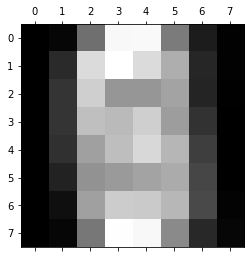

In [52]:
plt.gray()
plt.matshow(mapa) 
plt.show() 

Podemos ver que las columnas de los extremos no dan ninguna información, por lo tanto en un caso real se podrían quitar. 

Esto mismo podríamos hacer separando los datos de cada número para tener más información sobre cada clasificación.

Dado que todas las carecterísticas tienen valores en un mismo rango, no es necesaria la normalización.

Para elegir el clasificador compararemos entre varios de ellos:


**Regresión logística**

In [10]:
from sklearn.linear_model import LogisticRegression

Primero entrenamos el modelo:

In [11]:
logreg = LogisticRegression(max_iter=10000, C=1, penalty="l2").fit(X_train, y_train)

Una vez entrenado con el conjunto de entrenamiento probamos el rendimiento sobre el conjunto de test.

In [12]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [13]:
pred_test = logreg.predict(X_test)
pred_train = logreg.predict(X_train)

print("Tasa de acierto sobre entrenamiento: {:.3f}".format(accuracy_score(y_train, pred_train)))
print("Tasa de acierto sobre test: {:.3f}".format(accuracy_score(y_test, pred_test)))
print("Matriz de confusión:\n{}".format(confusion_matrix(y_test, pred_test, labels=digitos.target_names)))

Tasa de acierto sobre entrenamiento: 1.000
Tasa de acierto sobre test: 0.956
Matriz de confusión:
[[45  0  0  0  0  0  0  0  0  0]
 [ 0 48  0  0  0  0  1  0  3  0]
 [ 0  1 50  2  0  0  0  0  0  0]
 [ 0  0  0 53  0  0  0  0  1  0]
 [ 0  0  0  0 47  0  0  1  0  0]
 [ 0  0  0  0  0 54  1  0  0  2]
 [ 0  1  0  0  0  0 59  0  0  0]
 [ 0  0  0  1  1  0  0 51  0  0]
 [ 0  2  1  0  0  0  1  0 54  3]
 [ 0  0  0  0  0  1  0  0  1 55]]


Podemos ver que se consigue muy buenos resultados, aunque se puede estar produciendo un ligero sobreajuste, probemos con un valor para C más pequeño:

In [14]:
logreg = LogisticRegression(max_iter=10000, C=0.01, penalty="l2").fit(X_train, y_train)
pred_test = logreg.predict(X_test)
pred_train = logreg.predict(X_train)
print("Tasa de acierto sobre entrenamiento: {:.3f}".format(accuracy_score(y_train, pred_train)))
print("Tasa de acierto sobre test: {:.3f}".format(accuracy_score(y_test, pred_test)))
print("Matriz de confusión:\n{}".format(confusion_matrix(y_test, pred_test, labels=digitos.target_names)))

Tasa de acierto sobre entrenamiento: 0.995
Tasa de acierto sobre test: 0.963
Matriz de confusión:
[[45  0  0  0  0  0  0  0  0  0]
 [ 0 48  0  0  0  0  1  0  2  1]
 [ 0  2 51  0  0  0  0  0  0  0]
 [ 0  0  0 51  0  0  0  0  2  1]
 [ 0  0  0  0 47  0  0  1  0  0]
 [ 0  0  0  0  0 54  1  0  0  2]
 [ 0  1  0  0  0  0 59  0  0  0]
 [ 0  0  0  0  2  0  0 51  0  0]
 [ 0  2  1  0  0  0  0  0 58  0]
 [ 0  0  0  0  0  1  0  0  0 56]]


Ahora obtenemos un poco menos de rendimiento sobre el conjunto de entrenamiento ya que no nos ajustamos a él completamente, sin embargo mejoramos el rendimiento sobre ejemplos que no hemos visto nunca, que es nuestro objetivo.

Probemos ahora con regularización Lasso.

In [15]:
logreg = LogisticRegression(max_iter=10000,solver="saga",penalty="l1")
logreg.fit(X_train, y_train)
pred_train = logreg.predict(X_train)
pred_test = logreg.predict(X_test)
print("Tasa de acierto sobre entrenamiento: {:.3f}".format(accuracy_score(y_train, pred_train)))
print("Tasa de acierto sobre test: {:.3f}".format(accuracy_score(y_test, pred_test)))
print("Matriz de confusión:\n{}".format(confusion_matrix(y_test, pred_test, labels=digitos.target_names)))

Tasa de acierto sobre entrenamiento: 1.000
Tasa de acierto sobre test: 0.959
Matriz de confusión:
[[45  0  0  0  0  0  0  0  0  0]
 [ 0 50  0  0  0  0  0  0  1  1]
 [ 1  2 48  2  0  0  0  0  0  0]
 [ 0  0  0 52  0  0  0  0  1  1]
 [ 0  0  0  0 47  0  0  1  0  0]
 [ 0  0  0  0  0 55  1  0  0  1]
 [ 0  1  0  0  0  0 59  0  0  0]
 [ 0  0  0  1  1  0  0 51  0  0]
 [ 0  3  0  0  0  0  0  0 56  2]
 [ 0  0  0  0  0  1  0  0  1 55]]


De nuevo el clasificador se ajusta perfectamente al conjunto de entrenamiento, pero no tiene tan buen rendimiento sobre el sonjunto de test, probamos con un valor más pequeño para C:

In [16]:
logreg = LogisticRegression(max_iter=10000,solver="saga",penalty="l1", C=0.1)
logreg.fit(X_train, y_train)
pred_train = logreg.predict(X_train)
pred_test = logreg.predict(X_test)
print("Tasa de acierto sobre entrenamiento: {:.3f}".format(accuracy_score(y_train, pred_train)))
print("Tasa de acierto sobre test: {:.3f}".format(accuracy_score(y_test, pred_test)))
print("Matriz de confusión:\n{}".format(confusion_matrix(y_test, pred_test, labels=digitos.target_names)))

Tasa de acierto sobre entrenamiento: 0.990
Tasa de acierto sobre test: 0.956
Matriz de confusión:
[[45  0  0  0  0  0  0  0  0  0]
 [ 0 49  0  0  0  0  1  0  1  1]
 [ 1  2 48  2  0  0  0  0  0  0]
 [ 0  0  0 52  0  0  0  0  1  1]
 [ 0  0  0  0 47  0  0  1  0  0]
 [ 0  0  0  0  0 54  1  0  0  2]
 [ 0  1  0  0  0  0 59  0  0  0]
 [ 0  1  0  0  1  0  0 50  0  1]
 [ 0  3  1  0  0  0  0  0 57  0]
 [ 0  0  0  0  0  1  0  0  1 55]]


Se consigue un rendimiento bastante parecido al de L2, probemos con otros métodos.

**KNN**

In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
pred_train = neigh.predict(X_train)
pred_test = neigh.predict(X_test)
print("Tasa de acierto sobre entrenamiento: {:.3f}".format(accuracy_score(y_train, pred_train)))
print("Tasa de acierto sobre test: {:.3f}".format(accuracy_score(y_test, pred_test)))
print("Matriz de confusión:\n{}".format(confusion_matrix(y_test, pred_test, labels=digitos.target_names)))

Tasa de acierto sobre entrenamiento: 0.991
Tasa de acierto sobre test: 0.987
Matriz de confusión:
[[45  0  0  0  0  0  0  0  0  0]
 [ 0 51  0  0  0  1  0  0  0  0]
 [ 0  0 53  0  0  0  0  0  0  0]
 [ 0  0  1 53  0  0  0  0  0  0]
 [ 0  0  0  0 47  0  0  1  0  0]
 [ 0  0  0  0  0 55  1  0  0  1]
 [ 0  0  0  0  0  0 60  0  0  0]
 [ 0  0  0  0  0  0  0 53  0  0]
 [ 0  0  0  2  0  0  0  0 59  0]
 [ 0  0  0  0  0  0  0  0  0 57]]


Tras probar diferentes valores para k el mejor rendimiento lo conseguí con k=3 que como podemos ver consigue un rendimiento bastante bueno sobre este conjunto de datos, hasta ahora el mejor obtenido, aunque sigue fallando en algunos casos, por ejemplo ha fallado un par de veces al reconocer el 8 como un 3.

**SVM**

Probemos ahora con una máquina de vectores de soporte:

In [19]:
from sklearn import svm

In [20]:
clf = svm.SVC()
clf.fit(X_train, y_train)
pred_train = clf.predict(X_train)
pred_test = clf.predict(X_test)
print("Tasa de acierto sobre entrenamiento: {:.3f}".format(accuracy_score(y_train, pred_train)))
print("Tasa de acierto sobre test: {:.3f}".format(accuracy_score(y_test, pred_test)))
print("Matriz de confusión:\n{}".format(confusion_matrix(y_test, pred_test, labels=digitos.target_names)))

Tasa de acierto sobre entrenamiento: 0.994
Tasa de acierto sobre test: 0.991
Matriz de confusión:
[[45  0  0  0  0  0  0  0  0  0]
 [ 0 52  0  0  0  0  0  0  0  0]
 [ 0  0 53  0  0  0  0  0  0  0]
 [ 0  0  0 53  0  0  0  0  1  0]
 [ 0  0  0  0 48  0  0  0  0  0]
 [ 0  0  0  0  0 55  1  0  0  1]
 [ 0  0  0  0  0  0 60  0  0  0]
 [ 0  0  0  0  0  0  0 53  0  0]
 [ 0  1  0  0  0  0  0  0 60  0]
 [ 0  0  0  0  0  1  0  0  0 56]]


Ya sin modificar los parámetros por defecto consigue muy buena puntuación, aunque esta puntuación puede variar dependiendo de cómo se haya cogido el conjunto de entrenamiento y test, así que para obtener una puntuación más fiable y la mejor combinación de parámetros utilizaremos Grid-search + validación cruzada

**GRID SEARCH + VALIDACION CRUZADA**

Scikitlearn ya proporciona una función que implementa estas dos técnicas.

In [21]:
from sklearn.model_selection import GridSearchCV

Primero definimos los valores de los parámetros que vamos a buscar:

In [22]:
parametros = {"gamma": [0.001, 0.01, 0.1, 1, 10, 100],"C": [0.001, 0.01, 0.1, 1, 10, 100]}

Después se crea el objeto GridSearchCV, se entrena, al entrenar se prueba entre todas las combinaciones de parámetros dados y se queda con la que mejor media de puntuación dé utilizando validación cruzada, dejando el conjunto de test para hacer una medición final del rendimiento.

In [23]:
clf = svm.SVC()
gs_clf = GridSearchCV(clf, parametros).fit(X_train, y_train)

In [24]:
print("Mejores parámetros:",gs_clf.best_params_)
print("Mejor resultado sobre validación: {:.3f}".format(gs_clf.best_score_))

pred_test = gs_clf.predict(X_test)
print("Evaluación sobre el conjunto de test: {:.3f}".format(accuracy_score(y_test, pred_test)))
print("Matriz de confusión:\n{}".format(confusion_matrix(y_test, pred_test, labels=digitos.target_names)))

Mejores parámetros: {'C': 10, 'gamma': 0.001}
Mejor resultado sobre validación: 0.991
Evaluación sobre el conjunto de test: 0.991
Matriz de confusión:
[[45  0  0  0  0  0  0  0  0  0]
 [ 0 52  0  0  0  0  0  0  0  0]
 [ 0  0 52  0  0  0  0  1  0  0]
 [ 0  0  0 54  0  0  0  0  0  0]
 [ 0  0  0  0 48  0  0  0  0  0]
 [ 0  0  0  0  0 55  1  0  0  1]
 [ 0  0  0  0  0  0 60  0  0  0]
 [ 0  0  0  0  0  0  0 53  0  0]
 [ 0  1  0  0  0  0  0  0 60  0]
 [ 0  0  0  0  0  1  0  0  0 56]]


Este es el clasificador con el que mejor puntuación he obtenido, con un 99% de acierto sobre el conjunto de test. Sin embargo se podría mejorar, por ejemplo, creando un clasificador binario para que diferencie entre el 5 y el 9, que es uno de los fallos que se ven en la matriz de confusión.

Primero separamos de los datos originales los clasificados con un 5 o un 9.

In [25]:
X_train_59, y_train_59 = zip(*[(x,y) for x,y in zip(X_train, y_train)  if y==5 or y==9])
X_test_59, y_test_59 = zip(*[(x,y) for x,y in zip(X_test, y_test)  if y==5 or y==9])

Para este clasificador binario utilizaré **random forest**, dado que el tamaño de este conjunto de datos es menor podemos utilizar un método más potente. 

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
clf_59 = RandomForestClassifier(random_state=0).fit(X_train_59, y_train_59)

In [28]:
pred_train_59 = clf_59.predict(X_train_59)
pred_test_59 = clf_59.predict(X_test_59)
print("Tasa de acierto sobre entrenamiento: {:.3f}".format(accuracy_score(y_train_59, pred_train_59)))
print("Tasa de acierto sobre test: {:.3f}".format(accuracy_score(y_test_59, pred_test_59)))
print("Matriz de confusión:\n{}".format(confusion_matrix(y_test_59, pred_test_59), labels=[1,8]))

Tasa de acierto sobre entrenamiento: 1.000
Tasa de acierto sobre test: 0.965
Matriz de confusión:
[[55  2]
 [ 2 55]]


Aunque este nuevo clasificador binario falla en más ocasiones que el que utiliza SVM con one vs rest, por lo que no tiene demasiado sentido implementarlo para resolver el problema de distinguir entre el 5 y el 9.

Ya con nuestro clasificador entrenado vamos a mostrar los resultados que obtenemos, para ellos utilizamos la función metrics que nos proporciona sklearn:

In [29]:
from sklearn import metrics

In [30]:
print(metrics.classification_report(y_test, pred_test,target_names=["{:d}".format(i) for i in range(10)]))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       0.98      1.00      0.99        52
           2       1.00      0.98      0.99        53
           3       1.00      1.00      1.00        54
           4       1.00      1.00      1.00        48
           5       0.98      0.96      0.97        57
           6       0.98      1.00      0.99        60
           7       0.98      1.00      0.99        53
           8       1.00      0.98      0.99        61
           9       0.98      0.98      0.98        57

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540



Podemos ver que conseguimos un muy buen resultado, quizás destacar que el número que más le cuesta clasificar es el cinco, el cual acierta al clasificar en un 98% de las veces, aunque el porcentajes de cincos clasificados correctamente baja al 96%.

Vamos a mostrar ahora algunos ejemplos en los que el clasifiacador clasifica correctamente y otros en los que no.

In [31]:
bien_clasificadas = []
mal_clasificadas = []
for i in range(len(digitos.data)):
    c = gs_clf.predict([digitos.data[i]])
    if(c != [digitos.target[i]]):
        mal_clasificadas.append((i,c[0]))
    else:
        bien_clasificadas.append((i,c[0]))

In [32]:
import random

Un par de imagenes bien clasificadas:


<Figure size 432x288 with 0 Axes>

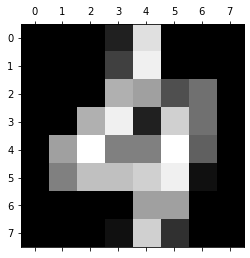

Clase de la imagen: 4
Clasificada como: 4


<Figure size 432x288 with 0 Axes>

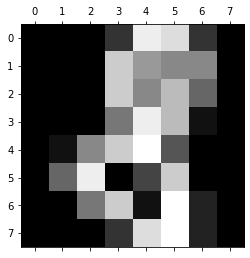

Clase de la imagen: 8
Clasificada como: 8


In [33]:
print("Un par de imagenes bien clasificadas:")
for i,c in random.sample(bien_clasificadas, k=2):
    plt.gray()
    plt.matshow(digitos.images[i]) 
    plt.show() 
    print("Clase de la imagen: {}".format(digitos.target[i]))
    print("Clasificada como:",c)


Un par de imagenes mal clasificadas:


<Figure size 432x288 with 0 Axes>

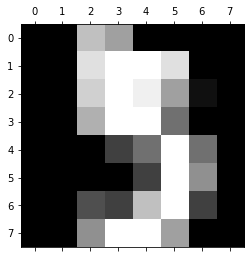

Clase de la imagen: 5
Clasificada como: 9


<Figure size 432x288 with 0 Axes>

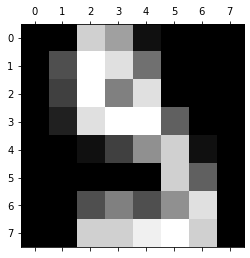

Clase de la imagen: 9
Clasificada como: 5


In [34]:
print("Un par de imagenes mal clasificadas:")
for i,c in random.sample(mal_clasificadas, k=2):
    plt.gray()
    plt.matshow(digitos.images[i]) 
    plt.show() 
    print("Clase de la imagen: {}".format(digitos.target[i]))
    print("Clasificada como:",c)
    